
For **N distinct points**, the number of **unique pairwise distances** is:

$[
\binom{N}{2} = \frac{N(N-1)}{2}
]$


### Correlation Dimension
The correlation integral counts **pairs of points** whose distance is less than $\varepsilon$:

$[
C(\varepsilon)
= \frac{2}{N(N-1)} \sum_{i<j}
H(\varepsilon - \|x_i - x_j\|)
]$


In [3]:
import numpy as np
from scipy.spatial.distance import pdist #To calculate distance between every two points
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

## **Correlation Dimension of Rossler Attractor**

In [4]:
def Rossler(u, t):
    x, y, z = u
    f1 = - y - z
    f2 = x + a*y
    f3 = b + z*(x - c)
    return np.array([f1, f2, f3])
a, b, c = 0.2, 0.2, 5.7
u0 = [1, 1, 1]
t = np.linspace(0, 1000, 20001)
sol = odeint(Rossler, u0, t)
X = sol

In [5]:
def correlation_integral(X, eps): #This function is to calculate fractional number of points of inside a sphere of radius epsilon
    N = len(X)
    distances = pdist(X)
    count = np.sum(distances < eps)
    return 2*count/(N*(N - 1))

In [6]:
EPS = np.linspace(1e-5, 0.82, 40)
C = np.array([correlation_integral(X, eps) for eps in EPS])
mask = C > 0 #to filter zeros
C_new = C[mask]
EPS_new = EPS[mask]
log_eps = np.log(EPS_new)
log_C = np.log(C_new)

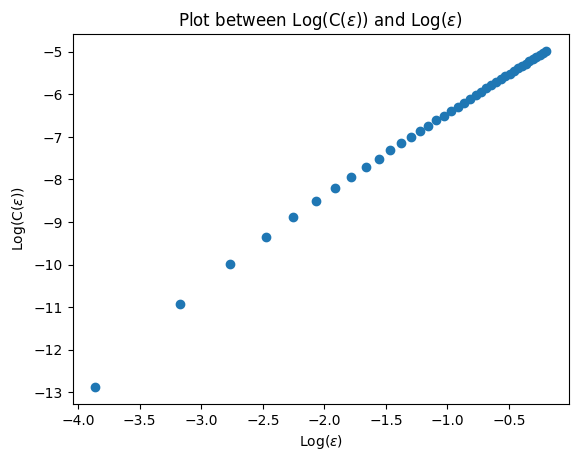

In [7]:
plt.scatter(log_eps, log_C)
plt.title(r"Plot between Log(C($\epsilon$)) and Log($\epsilon$)")
plt.xlabel(r"Log($\epsilon$)")
plt.ylabel(r"Log(C($\epsilon$))")
plt.show()

In [ ]:
D, _ = np.polyfit(log_eps, log_C, 1) 
print("